# Navigation Task with Multiple Targets

In [1]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.manager_som_position import ManagerSOMPosition, ManagerSOMPositionAllNeighbor
from custom_env.navigation_task import NavigationTaskMultiTarget
%matplotlib inline

path exception


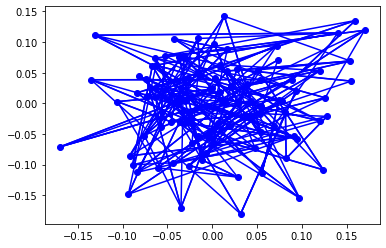

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


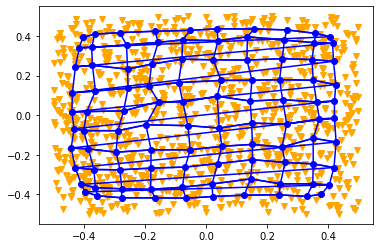

tensor([[ 0.3778, -0.3996],
        [ 0.3296, -0.4109],
        [ 0.2390, -0.4029],
        [ 0.1249, -0.4044],
        [ 0.0213, -0.4114],
        [-0.0669, -0.4202],
        [-0.1674, -0.4182],
        [-0.2774, -0.4178],
        [-0.3566, -0.4078],
        [-0.3973, -0.3882],
        [ 0.4034, -0.3526],
        [ 0.3494, -0.3477],
        [ 0.2430, -0.3470],
        [ 0.1452, -0.3223],
        [ 0.0193, -0.3479],
        [-0.0781, -0.3646],
        [-0.1823, -0.3749],
        [-0.2769, -0.3726],
        [-0.3632, -0.3665],
        [-0.4097, -0.3503],
        [ 0.4189, -0.2651],
        [ 0.3508, -0.2463],
        [ 0.2587, -0.2392],
        [ 0.1517, -0.2253],
        [ 0.0371, -0.2448],
        [-0.0688, -0.2627],
        [-0.1815, -0.2677],
        [-0.2828, -0.2764],
        [-0.3685, -0.2749],
        [-0.4294, -0.2665],
        [ 0.4259, -0.1361],
        [ 0.3507, -0.1170],
        [ 0.2487, -0.1619],
        [ 0.1512, -0.1482],
        [ 0.0514, -0.1576],
        [-0.0526, -0

In [2]:
x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

## Manager Self Organizing Map

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


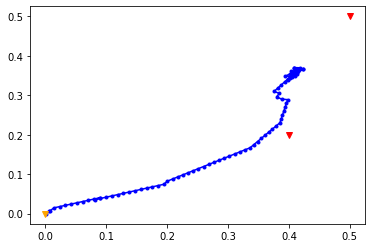

[True, False]
99 26.268077106491543


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


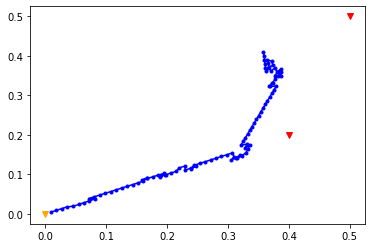

[True, False]
199 29.260766438058788


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


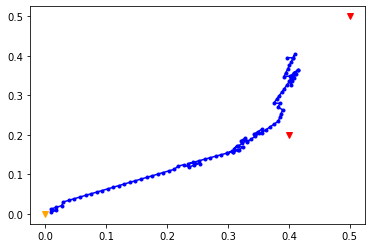

[True, False]
299 28.56832861543112


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


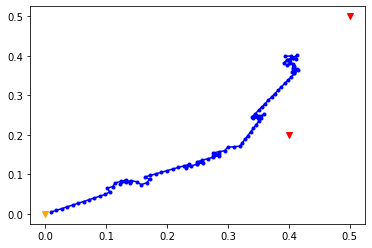

[True, False]
399 29.194666122790192


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


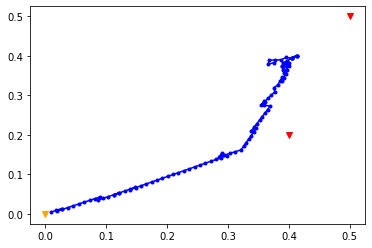

[True, False]
499 27.648510952555544


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


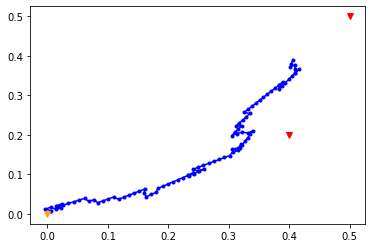

[True, False]
599 24.248977036530775


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


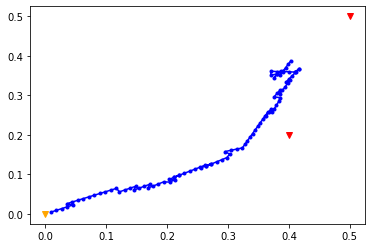

[True, False]
699 28.806024404636673


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


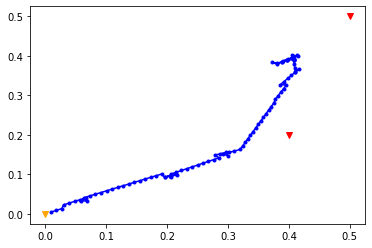

[True, False]
799 28.236525383268003


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


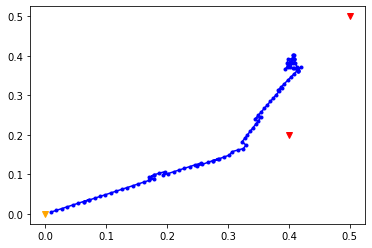

[True, False]
899 29.341351843900267


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


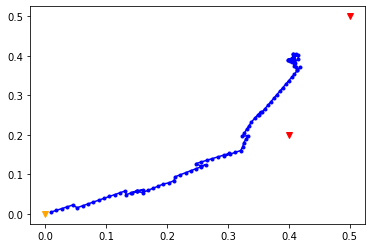

[True, False]
999 29.149433837086928


In [3]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPosition(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTaskMultiTarget()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        
        for i in range(task.all_goals.shape[0]):
            plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
        plt.show()
        print(task.goal_completed)
        print(epoch, total_return)
    
    task.reset()

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


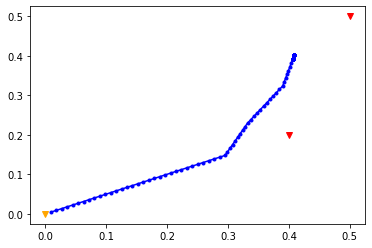

[True, False]
31.291320786180957


In [4]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')

for i in range(task.all_goals.shape[0]):
    plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
plt.show()
print(task.goal_completed)
print(total_return)

task.reset()

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


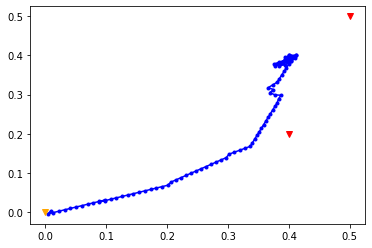

[True, False]
99 26.95063103024562


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


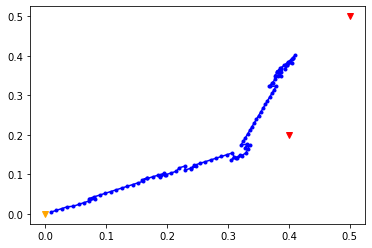

[True, False]
199 29.261241916803687


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


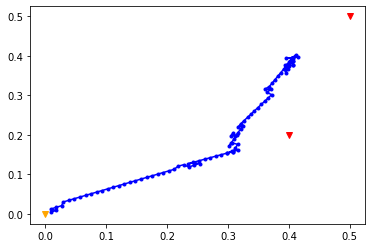

[True, False]
299 28.58409114913965


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


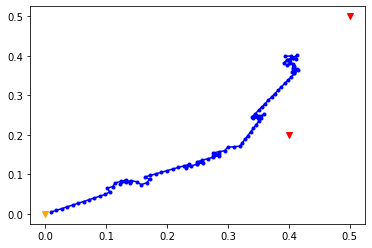

[True, False]
399 29.194666122790192


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


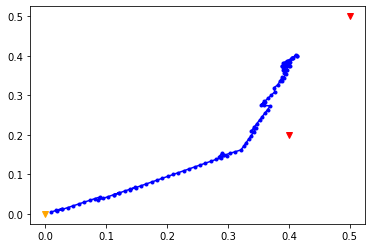

[True, False]
499 27.64865831199634


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


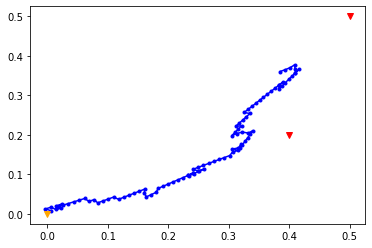

[True, False]
599 24.233535811011645


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


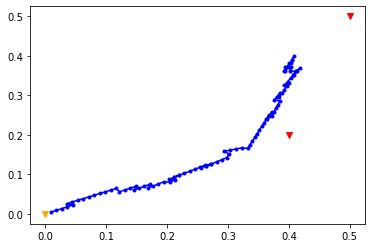

[True, False]
699 28.79971708498579


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


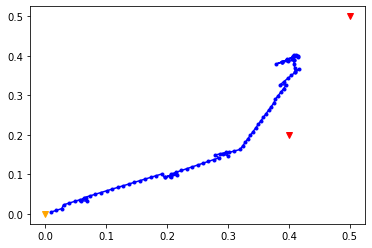

[True, False]
799 28.236584321739837


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


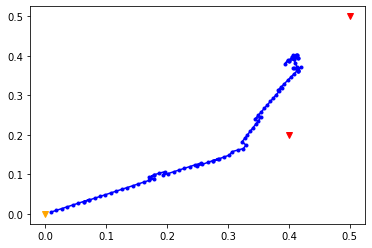

[True, False]
899 29.34145212286136


/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


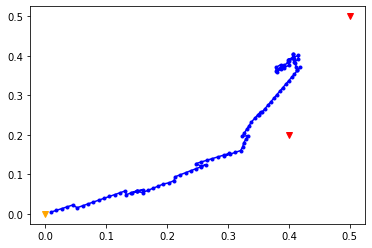

[True, False]
999 29.149190548556952


In [5]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPositionAllNeighbor(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTaskMultiTarget()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        
        for i in range(task.all_goals.shape[0]):
            plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
        plt.show()
        print(task.goal_completed)
        print(epoch, total_return)
    
    task.reset()

/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Volumes/Macintosh HD - Data/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


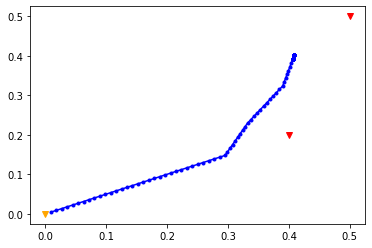

[True, False]
31.291320786180957


In [6]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')

for i in range(task.all_goals.shape[0]):
    plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
plt.show()
print(task.goal_completed)
print(total_return)

task.reset()

## Visualization of SOMs

In [7]:
from IPython.display import Image

def visualize_som(som, columns, labels = ["", ""], dim = 10):
    reshaped_x = som.w[:, columns[0]].reshape(dim, dim)
    reshaped_y = som.w[:, columns[1]].reshape(dim, dim)
    for v in range(dim):
        plt.plot(reshaped_x[:, v].numpy(), reshaped_y[:, v].numpy(), marker='None', linestyle='-', color='blue')
        plt.plot(reshaped_x[v, :].numpy(), reshaped_y[v, :].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(som.w[:, columns[0]].numpy(), som.w[:, columns[1]].numpy(), marker='o', color='blue')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()

0 tensor([ 0.3778, -0.3996])


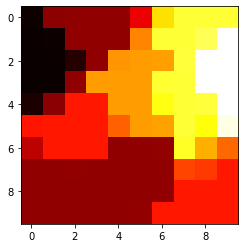

1 tensor([ 0.3296, -0.4109])


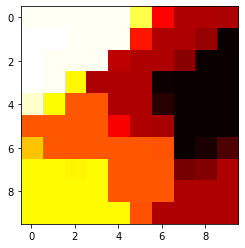

2 tensor([ 0.2390, -0.4029])


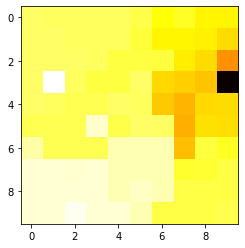

3 tensor([ 0.1249, -0.4044])


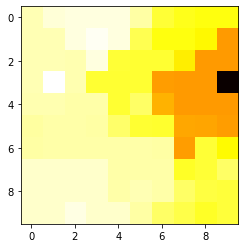

4 tensor([ 0.0213, -0.4114])


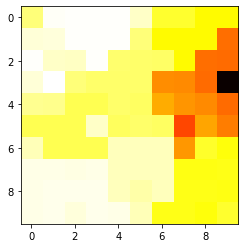

5 tensor([-0.0669, -0.4202])


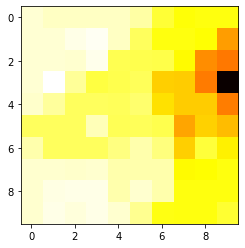

6 tensor([-0.1674, -0.4182])


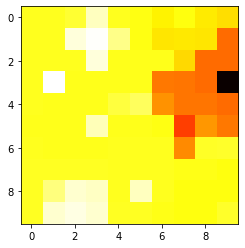

7 tensor([-0.2774, -0.4178])


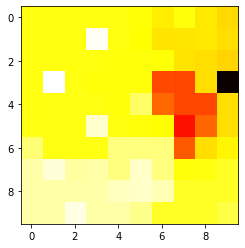

8 tensor([-0.3566, -0.4078])


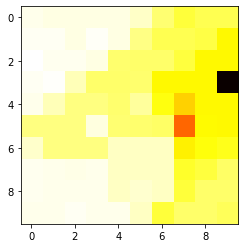

9 tensor([-0.3973, -0.3882])


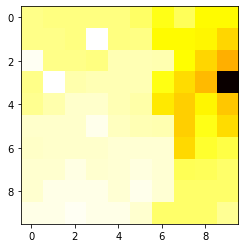

10 tensor([ 0.4034, -0.3526])


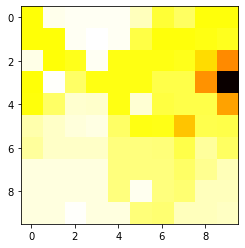

11 tensor([ 0.3494, -0.3477])


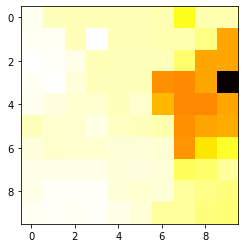

12 tensor([ 0.2430, -0.3470])


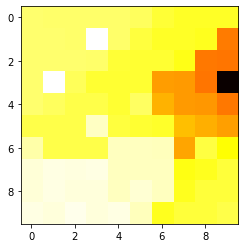

13 tensor([ 0.1452, -0.3223])


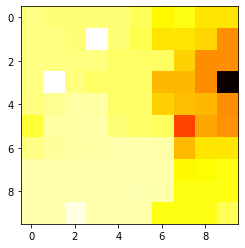

14 tensor([ 0.0193, -0.3479])


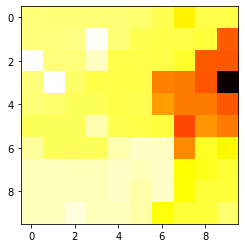

15 tensor([-0.0781, -0.3646])


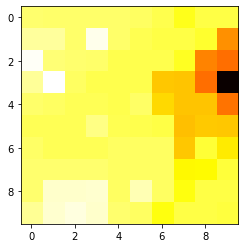

16 tensor([-0.1823, -0.3749])


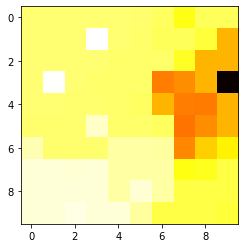

17 tensor([-0.2769, -0.3726])


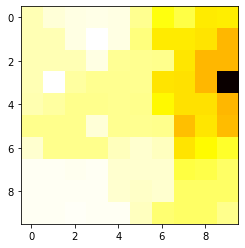

18 tensor([-0.3632, -0.3665])


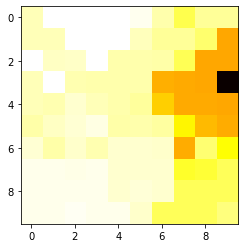

19 tensor([-0.4097, -0.3503])


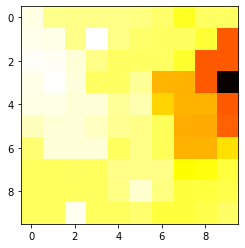

20 tensor([ 0.4189, -0.2651])


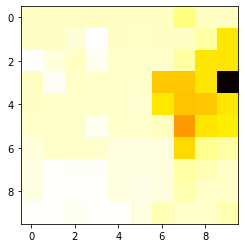

21 tensor([ 0.3508, -0.2463])


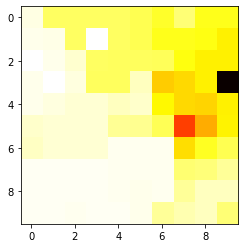

22 tensor([ 0.2587, -0.2392])


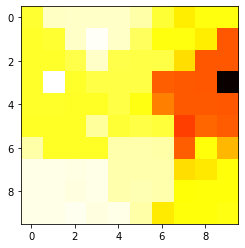

23 tensor([ 0.1517, -0.2253])


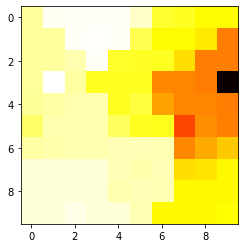

24 tensor([ 0.0371, -0.2448])


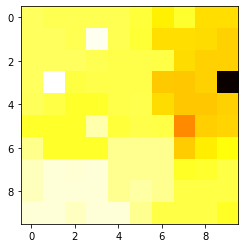

25 tensor([-0.0688, -0.2627])


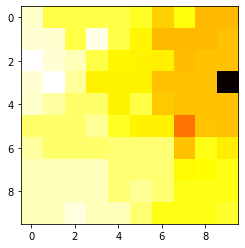

26 tensor([-0.1815, -0.2677])


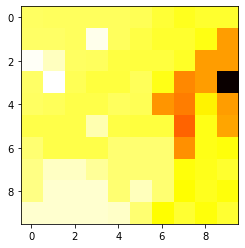

27 tensor([-0.2828, -0.2764])


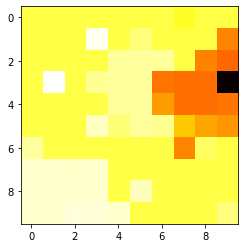

28 tensor([-0.3685, -0.2749])


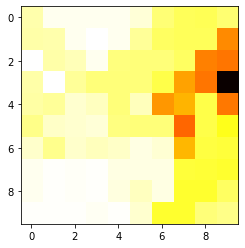

29 tensor([-0.4294, -0.2665])


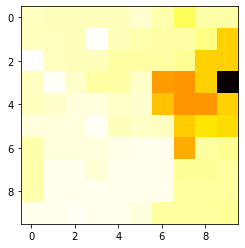

30 tensor([ 0.4259, -0.1361])


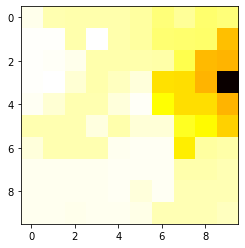

31 tensor([ 0.3507, -0.1170])


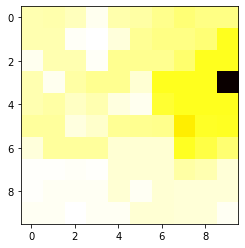

32 tensor([ 0.2487, -0.1619])


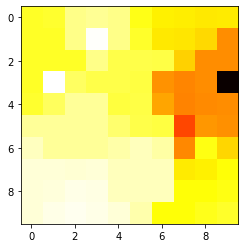

33 tensor([ 0.1512, -0.1482])


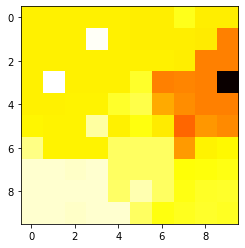

34 tensor([ 0.0514, -0.1576])


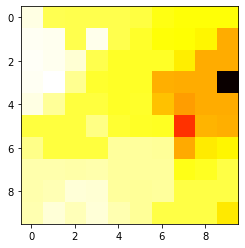

35 tensor([-0.0526, -0.1750])


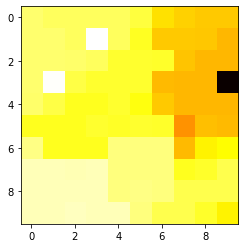

36 tensor([-0.1808, -0.1759])


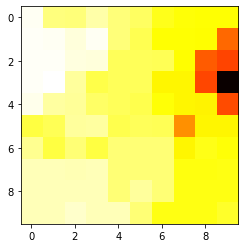

37 tensor([-0.2957, -0.1874])


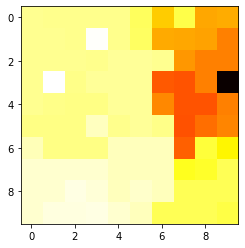

38 tensor([-0.3861, -0.1708])


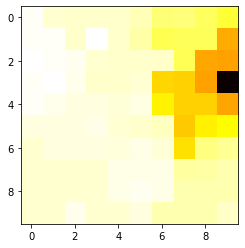

39 tensor([-0.4429, -0.1664])


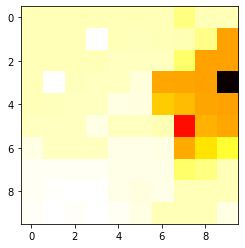

40 tensor([ 0.4204, -0.0159])


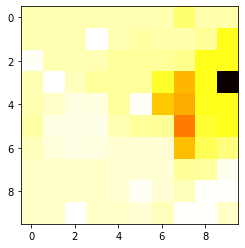

41 tensor([ 0.3710, -0.0192])


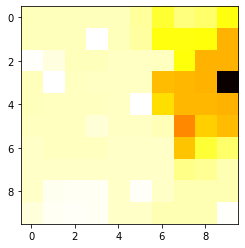

42 tensor([ 0.2638, -0.0454])


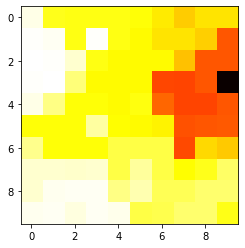

43 tensor([ 0.1491, -0.0405])


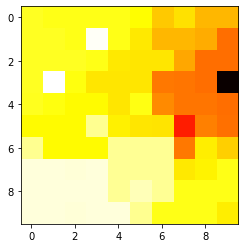

44 tensor([ 0.0425, -0.0656])


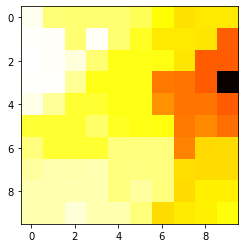

45 tensor([-0.0602, -0.0532])


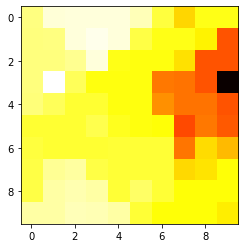

46 tensor([-0.1977, -0.0491])


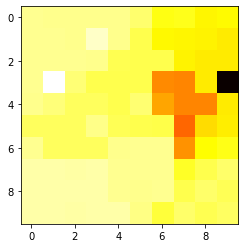

47 tensor([-0.2897, -0.0788])


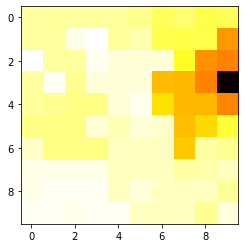

48 tensor([-0.4017, -0.0786])


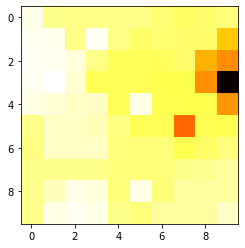

49 tensor([-0.4331, -0.0690])


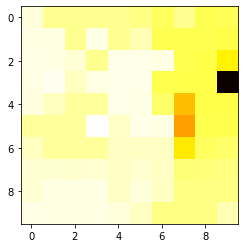

50 tensor([0.4204, 0.0710])


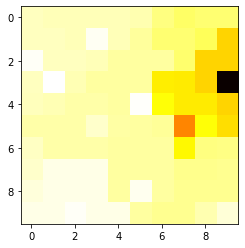

51 tensor([0.3620, 0.0659])


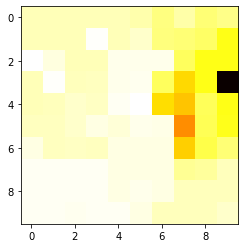

52 tensor([0.2503, 0.0784])


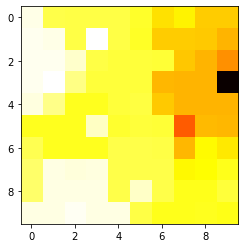

53 tensor([0.1440, 0.0711])


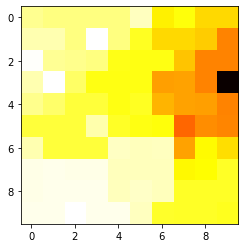

54 tensor([0.0361, 0.0952])


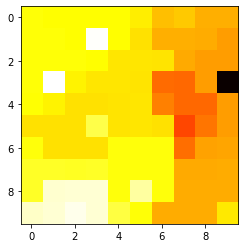

55 tensor([-0.0768,  0.0663])


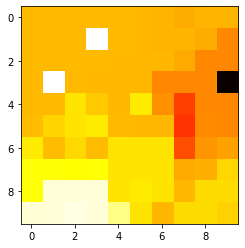

56 tensor([-0.1565,  0.0679])


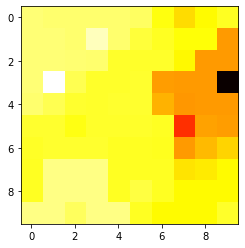

57 tensor([-0.2710,  0.0212])


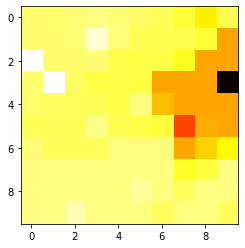

58 tensor([-0.3915,  0.0177])


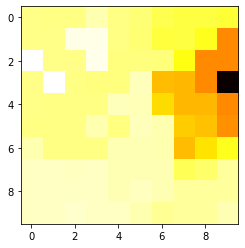

59 tensor([-0.4405,  0.0155])


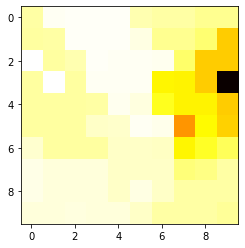

60 tensor([0.4249, 0.1539])


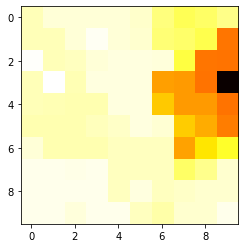

61 tensor([0.3509, 0.1760])


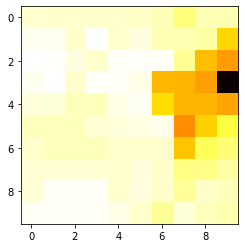

62 tensor([0.2405, 0.1789])


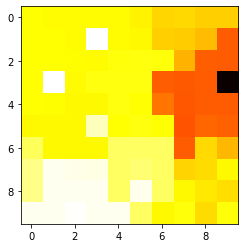

63 tensor([0.1499, 0.1759])


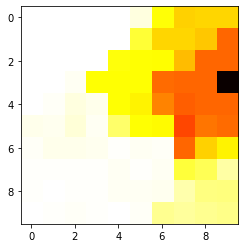

64 tensor([0.0486, 0.1752])


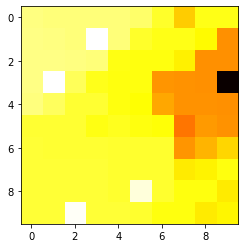

65 tensor([-0.0907,  0.1644])


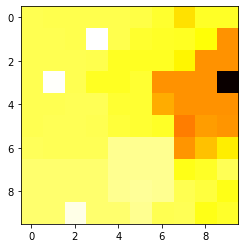

66 tensor([-0.1880,  0.1470])


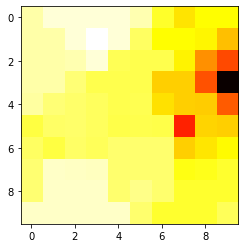

67 tensor([-0.2563,  0.1360])


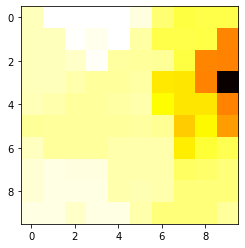

68 tensor([-0.3634,  0.1216])


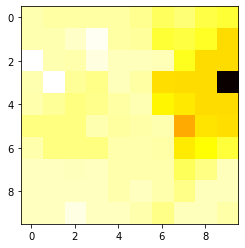

69 tensor([-0.4388,  0.1123])


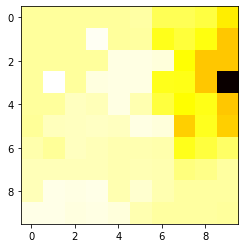

70 tensor([0.4175, 0.2718])


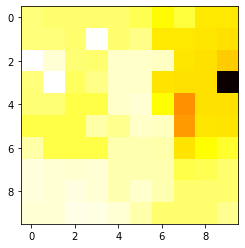

71 tensor([0.3466, 0.2805])


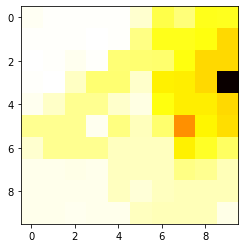

72 tensor([0.2491, 0.2851])


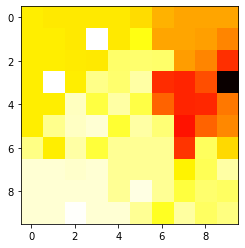

73 tensor([0.1335, 0.2778])


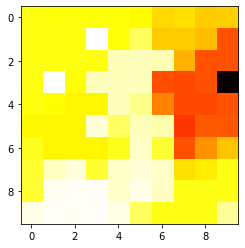

74 tensor([0.0230, 0.2794])


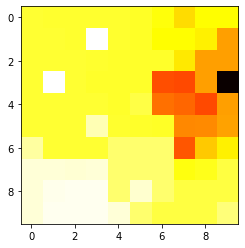

75 tensor([-0.0795,  0.2822])


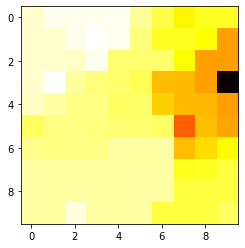

76 tensor([-0.1789,  0.2576])


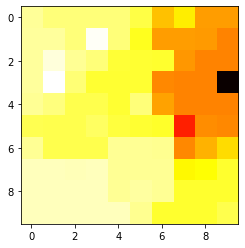

77 tensor([-0.2579,  0.2322])


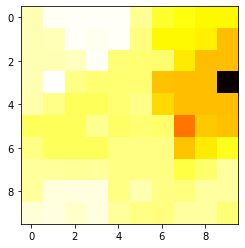

78 tensor([-0.3730,  0.2513])


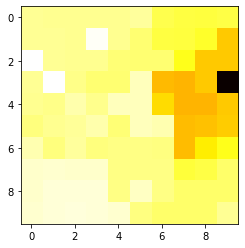

79 tensor([-0.4289,  0.2440])


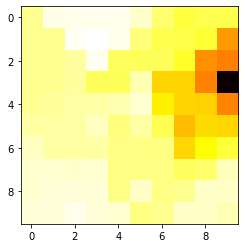

80 tensor([0.4142, 0.3634])


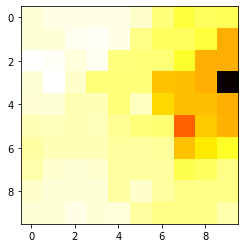

81 tensor([0.3548, 0.3660])


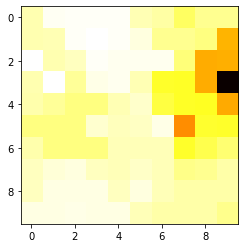

82 tensor([0.2564, 0.3784])


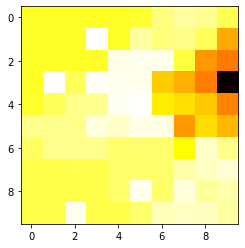

83 tensor([0.1349, 0.3955])


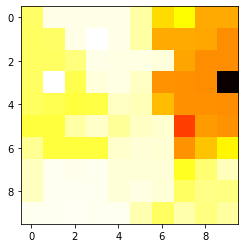

84 tensor([0.0382, 0.3759])


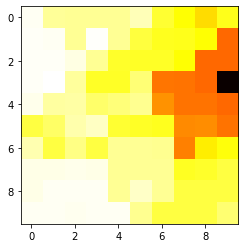

85 tensor([-0.0776,  0.3799])


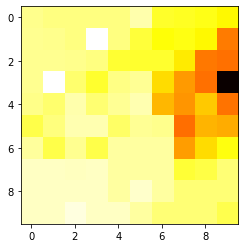

86 tensor([-0.1576,  0.3673])


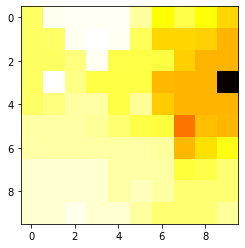

87 tensor([-0.2614,  0.3549])


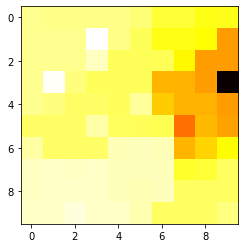

88 tensor([-0.3757,  0.3422])


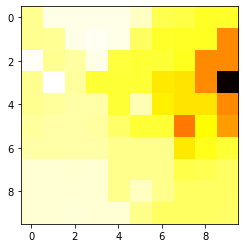

89 tensor([-0.4161,  0.3403])


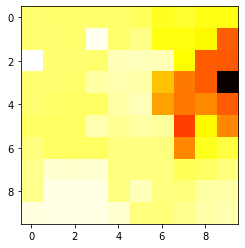

90 tensor([0.4074, 0.3960])


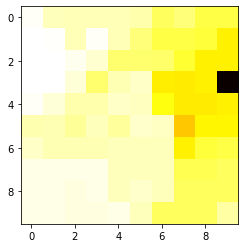

91 tensor([0.3580, 0.4130])


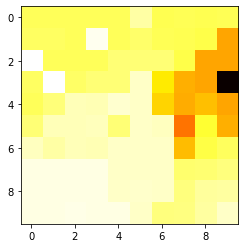

92 tensor([0.2647, 0.4303])


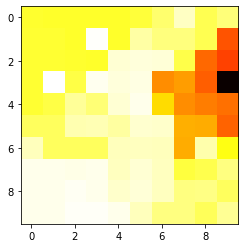

93 tensor([0.1569, 0.4352])


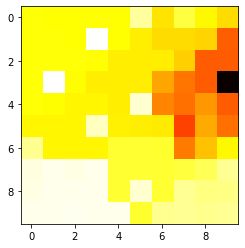

94 tensor([0.0364, 0.4359])


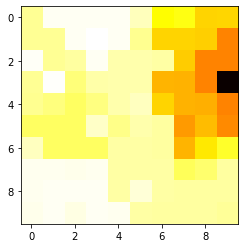

95 tensor([-0.0523,  0.4282])


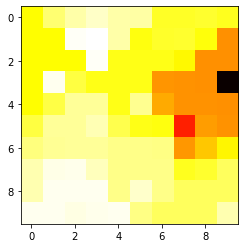

96 tensor([-0.1680,  0.4237])


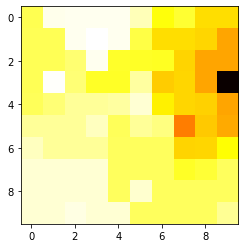

97 tensor([-0.2836,  0.4166])


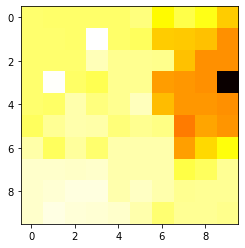

98 tensor([-0.3653,  0.4091])


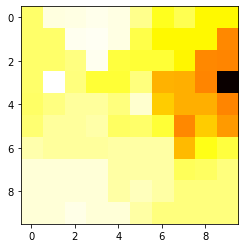

99 tensor([-0.4049,  0.3921])


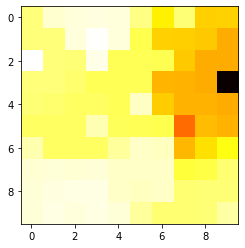

In [8]:
for i in range(100):
    print(i, som.w[i])
    plt.imshow(manager_som.w[:, i].reshape(10, 10), cmap='hot', interpolation='nearest')
    plt.show()

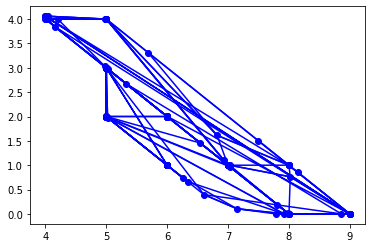

In [9]:
visualize_som(manager_som, [0, 1])